# <font color = "blue"> Business Understanding </font><br>
<br>
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicants profile. Two types of risks are associated with the banks decision:<br>
<br>
If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company<br>
<br>
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company<br>
<br>
The data given below contains the information about past loan applicants and whether they defaulted or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.<br>
<br>
In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.<br>
<br>
When a person applies for a loan, there are two types of decisions that could be taken by the company:<br>
<br>
Loan accepted If the company approves the loan, there are 3 possible scenarios described below:<br>
<br>
Fully paid  Applicant has fully paid the loan (the principal and the interest rate)<br>
<br>
Current  Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.<br>
<br>
Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
<br>
Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)<br>
 

# <font color = "blue"> Business Objectives </font><br>
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. <br>
<br>
Like most other lending companies, lending loans to risky applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. <br>
<br>
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.<br>

<br>
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. <br>

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.express as px
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
#read the csv file using palmos encoding

loan_app = pd.read_csv("D:\Python\Assignment_2\loan.csv",encoding='palmos',low_memory=False)
loan_app.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Pers

In [4]:
#print the observations of loan dataset

print(loan_app.shape)

(39717, 111)


In [5]:
#few column names are confusing.Let's rename it

loan_app = loan_app.rename(columns={
                       "dti": "debt-to-income", "issue_d": "issue_date","last_pymnt_d":"last_pymnt_date","open_acc":"open_crdtlines",
                        "total_rec_int":"total_intrst_recvd","total_rec_late_fee":"total_late_fee_rcvd",
                                   "total_rec_prncp":"total_prncp_rcvd","out_prncp":"outstanding_prncp_remaing","total_acc":"total_crdtlines"
                                   ,"out_prncp_inv":"outstanding_investor_prncp_remng","last_credit_pull_d":"last_credit_pull_date",
                                   "pub_rec_bankruptcies":"pub_recrd_bankruptcies"})

In [6]:
#create a function to get brief information about the dataset

def getInsightFromDataset(df):
    dFrame = pd.DataFrame(loan_app.dtypes,columns=['dtypes'])
    dFrame["Missing Value Count"] = loan_app.isnull().sum().values
    dFrame["Missing Value Ratio"] = ['{:.0f}'.format(x) for x in round(100*(loan_app.isnull().sum()/len(loan_app.id))).values]
    dFrame["Missing Value Ratio"] = dFrame["Missing Value Ratio"].astype(int)
    dFrame["Unique Values"] = loan_app.nunique()
    dFrame = dFrame.reset_index()
    dFrame.rename(columns={"index":"Name"},inplace=True)
    return dFrame.sort_values(["Missing Value Count"],ascending=False)

In [7]:
dataInsight = getInsightFromDataset(loan_app)

In [8]:
dataInsight.head(5)

,Name,dtypes,Missing Value Count,Missing Value Ratio,Unique Values
55,verification_status_joint,float64,39717,100,0
53,annual_inc_joint,float64,39717,100,0
81,mo_sin_old_rev_tl_op,float64,39717,100,0
80,mo_sin_old_il_acct,float64,39717,100,0
77,bc_util,float64,39717,100,0


In [9]:
#check how many columns have NaN values more than 50 

len(dataInsight.loc[dataInsight["Missing Value Ratio"] > 50])

57

In [10]:
#drop all 57 columns which are having NaN values more than 50%

loan_app = loan_app.drop(dataInsight.loc[dataInsight["Missing Value Ratio"] > 50,"Name"],axis=1)

In [11]:
#chekc the dimension of the dataset

loan_app.shape

(39717, 54)

In [12]:
#All above columns have either 0 or NaN values. since columns having 0 values for all rows are 
#not going to help us in analysis we can drop them. There are few more columns which are not useful in our analysis we can drop them too
#pymnt_plan-- fixed value of n which is not useful
#initial_list_status--fixed value which is not useful
#keep only one unique column so member_id and url-- not useful
#zip code--not useful
#emp_-title--not useful
#policy_code--fixed value of 1 which is not useful
#application_type--fixed value of "INDIVIDUAL" not useful
#acc_now_delinq
#delinq_amnt
#funded_amnt is not required
#desc: very descriptive column and not useful for analysis


listof_columndrop = ['collections_12_mths_ex_med','url', 'chargeoff_within_12_mths', 'tax_liens','zip_code','emp_title','pymnt_plan',
                    "policy_code","application_type","acc_now_delinq","delinq_amnt","member_id","funded_amnt","addr_state","desc"]
loan_app = loan_app.drop(listof_columndrop,axis=1)

In [13]:
#dimensions after removing not so useful columns

loan_app.shape

(39717, 39)

In [14]:
percent_missing = round(100*(loan_app.isnull().sum()/len(loan_app.id)), 2)

In [15]:
percent_missing[percent_missing>0]

emp_length               2.71
title                    0.03
revol_util               0.13
last_pymnt_date          0.18
last_credit_pull_date    0.01
pub_recrd_bankruptcies   1.75
dtype: float64

In [16]:
#emp_length is categorical column so we can impute using mode()

loan_app.emp_length.isnull().sum()

1075

In [17]:
loan_app.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [18]:
#we can see that 10+ years very highly dependent variable. So imputing NaN value will not be useful. We can impute random values
#first let's convert Non NaN values to integer

loan_app.loc[~(loan_app.emp_length.isnull()),"emp_length"] = loan_app.loc[~(loan_app.emp_length.isnull()),"emp_length"].apply(lambda x:int(x.split("+")[0]) if '+' in x else (0 if '<' in x else int(x.split(" ")[0])))

#now lets impute Nu;; values with random value between 0-10(10 exclusive)

loan_app.emp_length = loan_app.emp_length.apply(lambda x: np.random.choice(range(0,10)) if np.isnan(x) else x)

loan_app.emp_length.value_counts()

10    8879
0     4689
2     4498
3     4200
4     3549
5     3388
1     3343
6     2358
7     1877
8     1571
9     1365
Name: emp_length, dtype: int64

In [19]:
loan_app.revol_util.value_counts()

0%        977
0.20%      63
63%        62
0.10%      58
40.70%     58
         ... 
8.46%       1
33.29%      1
18.82%      1
0.83%       1
49.69%      1
Name: revol_util, Length: 1089, dtype: int64

In [20]:
loan_app.revol_util.isnull().sum()

50

In [21]:
#revol_util is a categorical and we can see that we cannot use mode since it is already having very large values. Let's impute
#using random values

loan_app.loc[~(loan_app.revol_util.isnull()),"revol_util"]=loan_app.loc[~(loan_app.revol_util.isnull()),"revol_util"].apply(lambda x :float(x.rstrip('%')))

loan_app.revol_util.fillna(round(np.random.uniform(0.0,100.0),2),inplace=True)

In [22]:
#since last_paymnt_d must not be < issue_d we can impute the Nan Values of last_paymen_d with issue_d 

loan_app.loc[loan_app.last_pymnt_date.isnull(),["id","issue_date","last_pymnt_date"]].head(5)

,id,issue_date,last_pymnt_date
26,1069800,Dec-11,NaN
2724,1032519,Nov-11,NaN
3613,1016039,Nov-11,NaN
3985,1009833,Nov-11,NaN
4206,1006579,Nov-11,NaN


In [23]:
loan_app.last_pymnt_date.fillna(loan_app.issue_date,inplace=True)

In [24]:
#imputing last_credit_pull_d with last_paymnt_date

loan_app.loc[loan_app.last_credit_pull_date.isnull(),["id","issue_date","last_pymnt_date","last_credit_pull_date"]]

,id,issue_date,last_pymnt_date,last_credit_pull_date
26025,575712,Sep-10,Jun-12,NaN
39476,186499,Dec-07,Aug-10,NaN


In [25]:
#imputing last_credit_pull_d with last_paymnt_date

loan_app.last_credit_pull_date.fillna(loan_app.last_pymnt_date,inplace=True)

In [26]:
#imputing NaN for pub_rec_bankruptcies values

loan_app.pub_recrd_bankruptcies.value_counts()

0.00    37339
1.00     1674
2.00        7
Name: pub_recrd_bankruptcies, dtype: int64

In [27]:
loan_app.pub_recrd_bankruptcies.fillna(np.random.choice(range(1,3)),inplace=True)

#convert the datatype for pub_rec_bankruptcies to int

loan_app.pub_recrd_bankruptcies = loan_app.pub_recrd_bankruptcies.astype("int32")

In [28]:
#imputing Nan values for title

loan_app.title.value_counts().head(3)

Debt Consolidation         2184
Debt Consolidation Loan    1729
Personal Loan               659
Name: title, dtype: int64

In [29]:
loan_app.title.fillna("Debt Consolidation",inplace=True)

In [30]:
percent_missing = round(100*(loan_app.isnull().sum()/len(loan_app.id)), 2)

In [31]:
percent_missing[percent_missing>0]

Series([], dtype: float64)

In [32]:
#check the observations again for the dataset
loan_app.shape

(39717, 39)

### Data Cleaning

In [33]:
#round off data to two decimal places for few columns

loan_app.total_pymnt= round(loan_app.total_pymnt,2)
loan_app.total_late_fee_rcvd= round(loan_app.total_late_fee_rcvd,2)
loan_app.collection_recovery_fee= round(loan_app.collection_recovery_fee,2)
loan_app.investor_funds= round(loan_app.funded_amnt_inv,2)

C:\Users\Aztec003\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.<br>
These columns are:<br>
<br>
issue_date<br>
earliest_cr_line<br>
last_pymnt_date<br>
last_credit_pull_date

In [34]:
datetime_colmns=['issue_date','earliest_cr_line','last_pymnt_date','last_credit_pull_date']
loan_app[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   issue_date             39717 non-null  object
 1   earliest_cr_line       39717 non-null  object
 2   last_pymnt_date        39717 non-null  object
 3   last_credit_pull_date  39717 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [35]:
#converting date specific columns to datetime

loan_app.issue_date = pd.to_datetime(loan_app.issue_date, format='%b-%y')
loan_app.earliest_cr_line = pd.to_datetime(loan_app.earliest_cr_line, format='%b-%y')
loan_app.last_pymnt_date = pd.to_datetime(loan_app.last_pymnt_date, format='%b-%y')
loan_app.last_credit_pull_date = pd.to_datetime(loan_app.last_credit_pull_date, format='%b-%y')

In [36]:
loan_app[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   issue_date             39717 non-null  datetime64[ns]
 1   earliest_cr_line       39717 non-null  datetime64[ns]
 2   last_pymnt_date        39717 non-null  datetime64[ns]
 3   last_credit_pull_date  39717 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.2 MB


In [37]:
#remove % from cell and convert the column to float

loan_app['int_rate'] = loan_app['int_rate'].str.rstrip('%').astype('float')

In [38]:
loan_app[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    39717 non-null  float64
 1   revol_util  39717 non-null  float64
dtypes: float64(2)
memory usage: 620.7 KB


In [39]:
# convert term column to int by fetching number information
loan_app.term = loan_app.term.apply(lambda x: x.split()[0])
loan_app.term = loan_app.term.astype('int')

In [40]:
loan_app['earliest_cr_line_month'] = loan_app['earliest_cr_line'].dt.month
loan_app['earliest_cr_line_year'] = loan_app['earliest_cr_line'].dt.year

In [41]:
loan_app.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1969      37
1970      48
1971      46
1972      53
1973      66
1974      65
1975      83
1976      97
1977     115
1978     165
1979     165
1980     180
1981     187
1982     224
1983     338
1984     409
1985     461
1986     500
1987     618
1988     740
1989     861
1990    1038
1991     980
1992    1063
1993    1514
1994    2027
1995    2150
1996    2274
1997    2456
1998    2851
1999    2968
2000    3250
2001    2521
2002    1927
2003    1856
2004    1761
2005    1493
2006    1169
2007     712
2008     159
2046       1
2050       1
2054       2
2056       1
2059       1
2061       2
2062       5
2063      10
2064       9
2065       9
2066      11
2067      18
2068      20
Name: loan_amnt, dtype: int64

In [42]:
# Data correction in future year information
#since python interprets 0-68 as 2000-2068 and 69-99 as 1969-1999

loan_app.loc[loan_app['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan_app['earliest_cr_line_year'] - 100

In [43]:
loan_app.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       2
1956       1
1959       1
1961       2
1962       5
1963      10
1964       9
1965       9
1966      11
1967      18
1968      20
1969      37
1970      48
1971      46
1972      53
1973      66
1974      65
1975      83
1976      97
1977     115
1978     165
1979     165
1980     180
1981     187
1982     224
1983     338
1984     409
1985     461
1986     500
1987     618
1988     740
1989     861
1990    1038
1991     980
1992    1063
1993    1514
1994    2027
1995    2150
1996    2274
1997    2456
1998    2851
1999    2968
2000    3250
2001    2521
2002    1927
2003    1856
2004    1761
2005    1493
2006    1169
2007     712
2008     159
Name: loan_amnt, dtype: int64

## Functions for creating different kind of plots for analysis



In [42]:
def plotScatterPlotfig(x1,y1):
    fig,ax  = plt.subplots(figsize=(5,5))
    ax.scatter(x=loan_app.loc[loan_app.loan_status=="Charged Off",x1],y=loan_app.loc[loan_app.loan_status=="Charged Off",y1],color='r',alpha=0.5)
    ax.set_title("scatter plot for "+y1+" to understand outliers")
    plt.show()

In [43]:
def plotBoxPlot(col):
    plt.figure(figsize=(15,5))
    ax = snb.boxplot(x=loan_app[col])
    ax.set_title("box plot for "+col)
    plt.show()

In [44]:
def plotPieChart(df):
    plt.pie(df,labels=['Charged Off','Fully Paid'],autopct='%1.1f%%')
    plt.axis('equal')
    plt.title("Loan Status Distribution")
    plt.legend(title="distrubtion of investor_funds",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

In [45]:
def plotCountPlot(_col,_order,_title,_figsize=(8,7)):
    plt.figure(figsize=_figsize)
    snb.set(style="darkgrid")
    p=snb.countplot(x=loan_app[_col],order=_order)
    p.set_xticklabels(p.get_xticklabels(), rotation=45)
    plt.title(_title)
    plt.show()
    

In [46]:
def plotJointplot(x1,y1,_title,_figsize=(7,7)):
    plt.figure(figsize=_figsize)
    p = snb.jointplot(loan_app[x1],loan_app[y1],space=0, alpha=0.3,kind='kde')
    p.fig.suptitle(_title)
    p.ax_joint.collections[0].set_alpha(0.5)
    p.fig.tight_layout()
    p.fig.subplots_adjust(top=0.95)

In [47]:
def plot_percentages(dataframe, by, sortbyindex=False,_figsize=(7,7)):
    plt.figure(figsize=_figsize)
    plt.subplot(1, 2, 1)
    values = (loan_app[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=snb.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    
    plt.subplot(1, 2, 2)
   
    values = (loan_app.loc[loan_app['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=snb.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)

In [48]:
def plot_distribution(dataframe, col,_figsize=(7,7)):
    plt.figure(figsize=_figsize)
    plt.subplot(1, 2, 1)
    ax = snb.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    snb.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [49]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [50]:
def plotBarplot(dataframe, by, loanstatus='Charged Off',_figsize=(8,7)):
    plt.figure(figsize=_figsize)
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=snb.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [51]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=snb.color_palette('husl', 16))
    plt.tight_layout()

## <font color = "red" > Observation: Check for any outliers in any integer columns </font>

In [52]:
##Print summary metrics for all numeric columns

loan_app.select_dtypes(["float64","int64"]).describe(percentiles=(0.25,0.5,0.75,0.95,0.99))

,id,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,debt-to-income,delinq_2yrs,inq_last_6mths,open_crdtlines,pub_rec,revol_bal,revol_util,total_crdtlines,outstanding_prncp_remaing,outstanding_investor_prncp_remng,total_pymnt,total_pymnt_inv,total_prncp_rcvd,total_intrst_recvd,total_late_fee_rcvd,recoveries,collection_recovery_fee,last_pymnt_amnt,earliest_cr_line_month,earliest_cr_line_year
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00
mean,683131.91,11219.44,10397.45,12.02,324.56,4.96,68968.93,13.32,0.15,0.87,9.29,0.06,13382.53,48.77,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,6.89,1996.79
std,210694.13,7456.67,7128.45,3.72,208.87,3.55,63793.77,6.68,0.49,1.07,4.40,0.24,15885.02,28.36,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,3.54,7.41
min,54734.00,500.00,0.00,5.42,15.69,0.00,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1969.00
25%,516221.00,5500.00,5000.00,9.25,167.02,2.00,40404.00,8.17,0.00,0.00,6.00,0.00,3703.00,25.30,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,4.00,1993.00
50%,665665.00,10000.00,8975.00,11.86,280.22,4.00,59000.00,13.40,0.00,1.00,9.00,0.00,8850.00,49.20,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,7.00,1998.00
75%,837755.00,15000.00,14400.00,14.59,430.78,9.00,82300.00,18.60,0.00,1.00,12.00,0.00,17058.00,72.30,29.00,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,3293.16,10.00,2001.00
95%,1039966.20,25000.00,24736.57,18.54,763.00,10.00,142000.00,23.84,1.00,3.00,17.00,1.00,41656.40,93.50,43.00,0.00,0.00,30245.12,29627.24,24999.98,7575.81,14.92,362.42,5.15,12183.94,12.00,2006.00
99%,1063236.40,35000.00,34750.00,20.99,931.54,10.00,234999.36,26.68,2.00,4.00,22.00,1.00,83101.88,98.48,56.00,2095.53,2092.18,42214.15,41445.16,33894.00,12798.84,33.72,2010.11,296.13,21174.01,12.00,2007.00
max,1077501.00,35000.00,35000.00,24.59,1305.19,10.00,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,99.90,90.00,6311.47,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,12.00,2068.00


from above output we can see that there are few outliers for few columns like delinq_2yrs,pub_rec,annual_income,open_crdtlines since there max value is very large than 99% percentile. We can remove such records

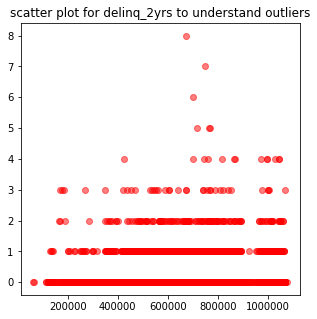

In [53]:
plotScatterPlotfig("id","delinq_2yrs")

In [54]:
#### From above scatter plot and summary metrics we can see that most of the loan borrowers are having delinq_2yrs <=2
#remove outliers by removing all rows having delinq_2yrs > 99% percentile value


loan_app = loan_app.loc[~(loan_app.delinq_2yrs > 2)]

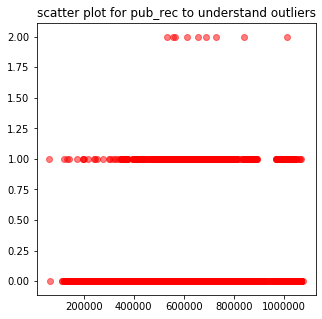

In [55]:
#scatter plot for pub_rec
plotScatterPlotfig("id","pub_rec")

In [56]:
#### From above scatter plot and summary metrics we can see that most of the loan borrowers are having pub_rec <=1
#remove outliers by removing all rows having pub_rec > 99% percentile value

loan_app = loan_app.loc[~(loan_app.pub_rec > 1)]

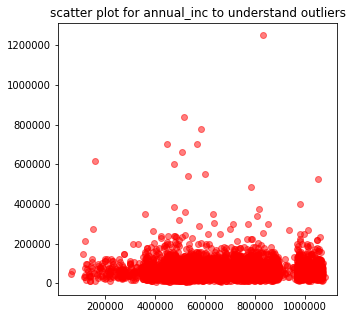

In [57]:
#scatter plot for annual_inc

plotScatterPlotfig("id","annual_inc")

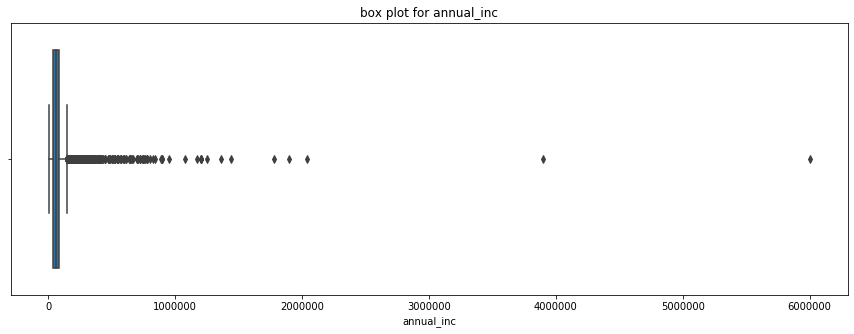

In [58]:
plotBoxPlot("annual_inc")

In [59]:
#remove outliers by removing all rows having annual_inc > 99% percentile value
loan_app = loan_app.loc[~(loan_app.annual_inc > 234144)]

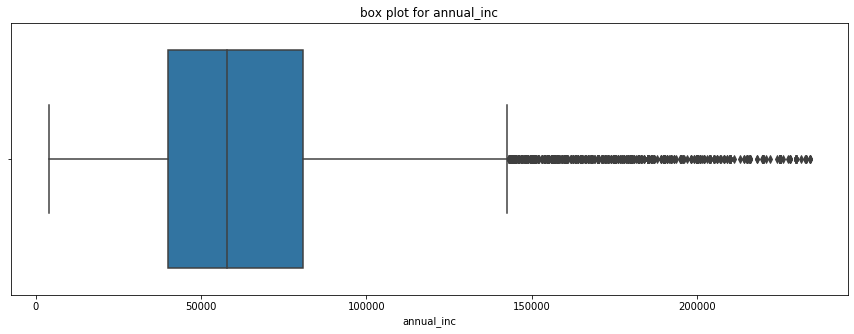

In [60]:
plotBoxPlot("annual_inc")

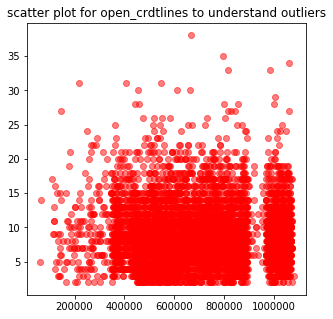

In [61]:
#plot scatter plot for open_crdtlines
plotScatterPlotfig("id","open_crdtlines")

there is a huge difference between max open creditlines and 99%. We can remove those outliers

In [62]:
#remove outliers by removing all rows having open_Crdtlines > 99% percentile value
loan_app = loan_app.loc[~(loan_app.open_crdtlines > 22)]

In [63]:
##Print summary metrics for all numeric columns

loan_app.select_dtypes(["float64","int64"]).describe(percentiles=(0.25,0.5,0.75,0.95,0.99))

,id,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,debt-to-income,delinq_2yrs,inq_last_6mths,open_crdtlines,pub_rec,revol_bal,revol_util,total_crdtlines,outstanding_prncp_remaing,outstanding_investor_prncp_remng,total_pymnt,total_pymnt_inv,total_prncp_rcvd,total_intrst_recvd,total_late_fee_rcvd,recoveries,collection_recovery_fee,last_pymnt_amnt,earliest_cr_line_month,earliest_cr_line_year
count,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00,38598.00
mean,683552.49,11139.07,10329.74,11.94,321.82,4.94,65346.31,13.35,0.12,0.86,9.13,0.05,13150.77,48.92,21.76,50.23,50.00,12047.41,11472.58,9722.27,2229.94,1.35,93.85,12.13,2656.62,6.89,1996.87
std,210669.45,7377.82,7052.00,3.69,205.96,3.54,35132.50,6.67,0.37,1.07,4.10,0.22,15388.19,28.35,11.11,368.44,367.09,8920.44,8822.87,6983.77,2559.20,7.25,683.53,147.30,4403.80,3.54,7.33
min,54734.00,500.00,0.00,5.42,15.69,0.00,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1969.00
25%,516491.00,5500.00,5000.00,8.94,166.38,2.00,40000.00,8.23,0.00,0.00,6.00,0.00,3705.25,25.50,13.00,0.00,0.00,5564.64,5099.31,4550.00,655.34,0.00,0.00,0.00,218.00,4.00,1994.00
50%,665835.00,10000.00,8925.00,11.72,278.94,4.00,58000.00,13.45,0.00,1.00,9.00,0.00,8813.50,49.50,20.00,0.00,0.00,9833.15,9244.37,8000.00,1334.59,0.00,0.00,0.00,542.28,7.00,1998.00
75%,838114.25,15000.00,14275.00,14.35,426.04,9.00,80400.00,18.62,0.00,1.00,12.00,0.00,16879.00,72.50,28.00,0.00,0.00,16422.38,15675.19,13475.00,2791.72,0.00,0.00,0.00,3268.90,10.00,2001.00
95%,1040264.10,25000.00,24601.44,18.39,746.44,10.00,135000.00,23.86,1.00,3.00,17.00,1.00,40281.05,93.60,42.00,0.00,0.00,29928.91,29305.67,24250.00,7466.57,14.91,357.12,5.01,12104.47,12.00,2006.00
99%,1063421.30,35000.00,34650.00,20.89,921.11,10.00,189000.00,26.69,2.00,4.00,20.00,1.00,79574.59,98.50,54.00,2048.23,2027.33,41826.05,40730.86,32000.00,12490.35,33.32,1973.23,281.87,21021.81,12.00,2007.00
max,1077501.00,35000.00,35000.00,24.40,1305.19,10.00,234000.00,29.99,2.00,8.00,22.00,1.00,149588.00,99.90,90.00,6307.37,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,12.00,2068.00


There are few columns like total_late_fee_rcvd, recoveries, collection_recovery_fee,total+intrst_recvd etc.. These columns are applicable once loan has been given so not removing outliers from them

# <font color = "blue"> Univariate Analysis </font>

## <font color = "Red"> Observation : Distribution of loan amount for different type of loan status? </font>

In [64]:
#For loan status we should focus on Fully Paid and Charged Off loans only since we want to analyse bad loans and good loans

loan_app = loan_app[loan_app['loan_status'].isin(['Fully Paid','Charged Off'])]
loan_app.shape

(37499, 41)

In [65]:
loan_app.loan_status.value_counts()

Fully Paid     32036
Charged Off     5463
Name: loan_status, dtype: int64

In [66]:
#Create a pie chart to see loan distribution status

amountbyloansttaus = pd.DataFrame([{'Charged Off' : loan_app.loc[loan_app.loan_status=="Charged Off","funded_amnt_inv"].sum(),'Fully Paid':loan_app.loc[loan_app.loan_status=="Fully Paid","funded_amnt_inv"].sum()}])

C:\Users\Aztec003\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


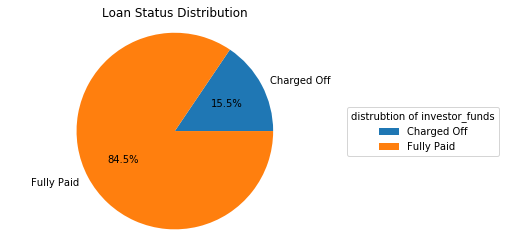

In [67]:
plotPieChart(amountbyloansttaus)

#### `from above pie chart it is clear that approximately 15% of loans in the dataset are defaulted.`

## <font color = "Red"> Observation: the year wise distribution of loan amount</font>

In [68]:
loan_app['issue_date_month'] = loan_app['issue_date'].dt.month
loan_app['issue_date_year'] = loan_app['issue_date'].dt.year

In [69]:
loan_app.groupby(['issue_date_year'])["id"].count()

issue_date_year
2007      237
2008     1507
2009     4579
2010    11215
2011    19961
Name: id, dtype: int64

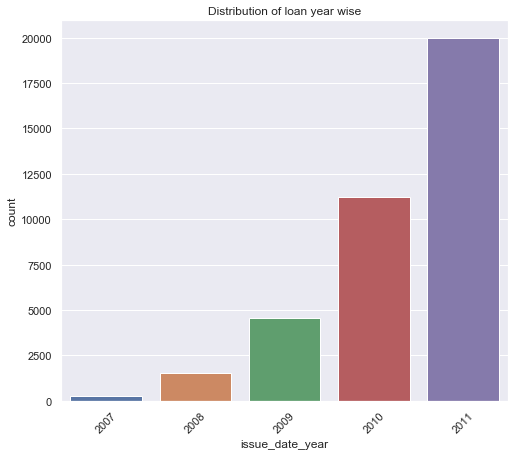

In [70]:
#loan distribution year wise
_order= sorted(loan_app.issue_date_year.unique())

plotCountPlot("issue_date_year",_order,"Distribution of loan year wise")

<Figure size 504x504 with 0 Axes>

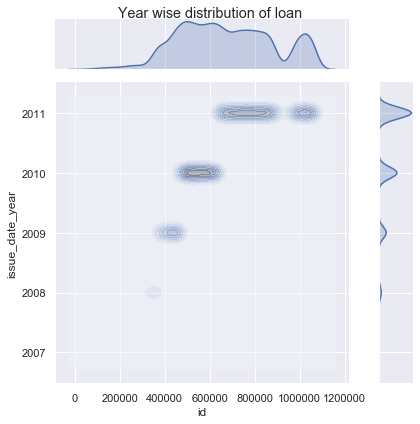

In [71]:
#draw a jointplot plot by issue date
plotJointplot("id","issue_date_year","Year wise distribution of loan")

#### `Above distribution shows that number of loan given increased every year.2007 is the year where lowest number of loans were given due to global recession. 2011 is the year where highest number of the loans were given`

### Does the issue year make any impact on loan defaults?

Ans: No.. We can see that loan disburtion increases every year after market started came out of crisis. But this variable is not useful to identify bad loans/defaulters

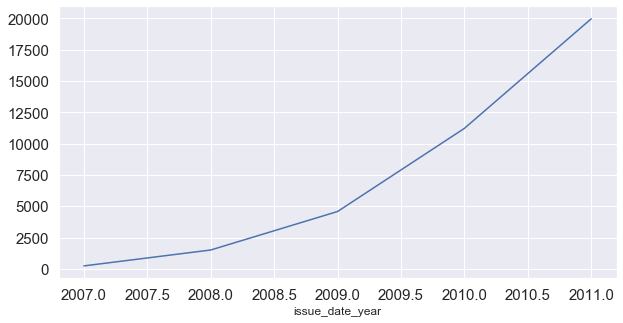

In [72]:
plt.figure(figsize=(10,5))
loan_app.groupby('issue_date_year').loan_amnt.count().plot(kind='line', fontsize=15)
plt.show()

## <font color = "Red"> Observation: Loan distribution for diffrent grade types </font>

In [73]:
(loan_app['grade'].value_counts(normalize=True)*100).sort_index()

A   26.54
B   30.56
C   20.25
D   12.99
E    6.66
F    2.34
G    0.66
Name: grade, dtype: float64

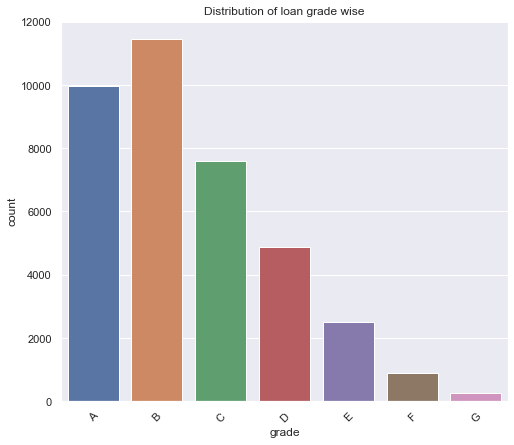

In [74]:
plotCountPlot("grade",sorted(loan_app.grade.unique()),"Distribution of loan grade wise")

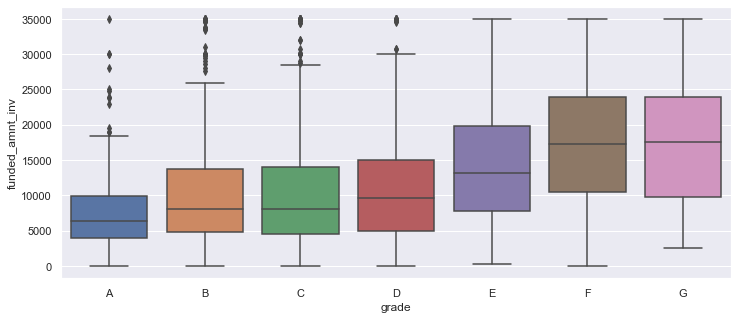

In [81]:
#Set style first
plt.figure(figsize=(12,5))
snb.boxplot(x = "grade", y = "funded_amnt_inv", data=loan_app[loan_app.loan_status=="Charged Off"],order=sorted(list(loan_app.grade.unique())))

Larger loans generally appear to be given a lower grade, with the median loan amount ,for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

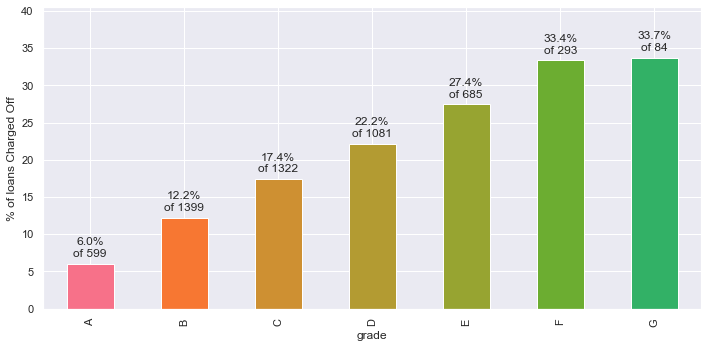

In [82]:
plotBarplot(loan_app, 'grade',_figsize=(10,5))

### `Most of the loans are A,B,C graded loans`   Box plot for charged off loans  shows that loans which are given having low grades like E,F,G are having large investor funds and thus loss is huge. So as loan grade decreases chances of bad loan increases.Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

## <font color = "Red"> Observation: Loan distribution sub grade types </font> 

In [83]:
loan_app.sub_grade.value_counts(normalize=True).head()

A4   0.08
B3   0.07
A5   0.07
B5   0.07
B4   0.06
Name: sub_grade, dtype: float64

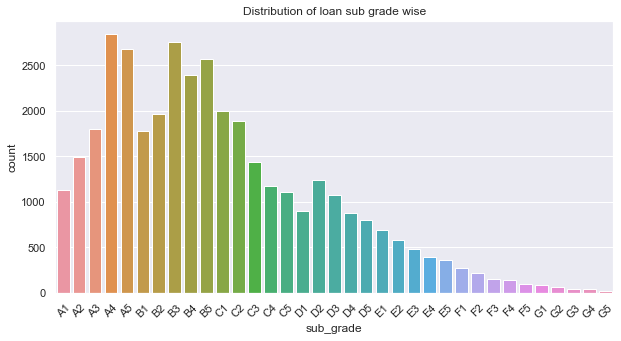

In [84]:
plotCountPlot("sub_grade",sorted(loan_app.sub_grade.unique()),"Distribution of loan sub grade wise",(10,5))

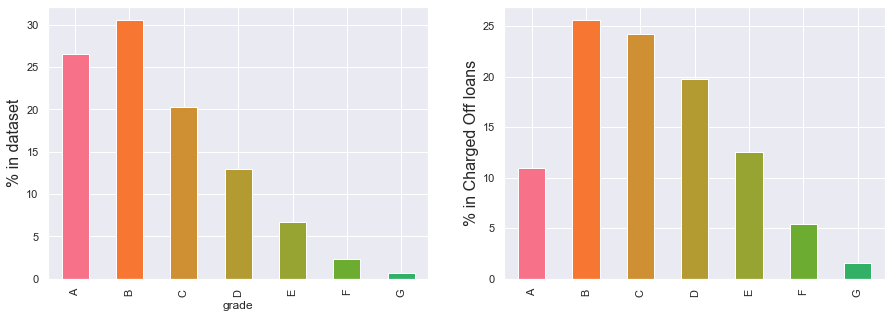

In [85]:
plot_percentages(loan_app, 'grade', True,_figsize=(15,5))

Observation:<br>
<br>
Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.<br>
Grade D, E, F, G loans are less safe. We should plot grade by percentage Charged Off by category<br>
Lending Clubs grading system is working well.`

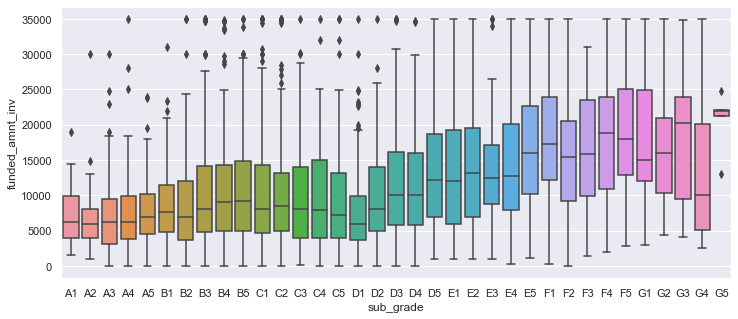

In [86]:
plt.figure(figsize=(12,5))
snb.boxplot(x = "sub_grade", y = "funded_amnt_inv", data=loan_app[loan_app.loan_status=="Charged Off"],order=sorted(list(loan_app.sub_grade.unique())))

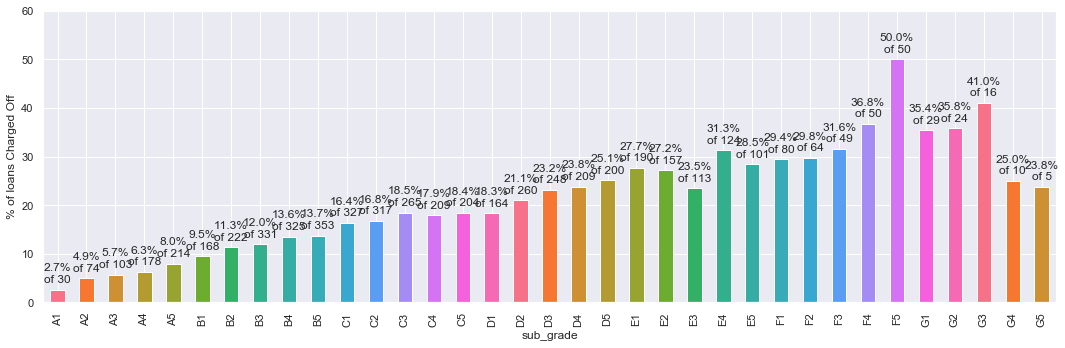

In [87]:
plotBarplot(loan_app, 'sub_grade',_figsize=(15,5))

#### `For sub grade also we have similar observation as Grades. Most of the loans are high sub graded loans but as per the box plot, investor funds is large for low sub graded loans and results in a big losses`

## <font color = "Red"> Observation : Loan distribution for diffrent Loan purpose </font>

In [88]:
loan_app.purpose.value_counts(normalize=True)

debt_consolidation   0.47
credit_card          0.13
other                0.10
home_improvement     0.07
major_purchase       0.06
small_business       0.04
car                  0.04
wedding              0.02
medical              0.02
moving               0.01
vacation             0.01
house                0.01
educational          0.01
renewable_energy     0.00
Name: purpose, dtype: float64

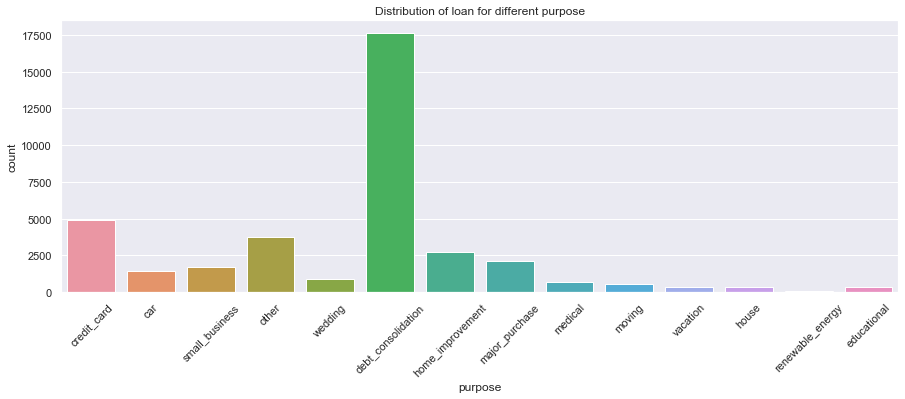

In [89]:
plotCountPlot("purpose",loan_app.purpose.unique(),"Distribution of loan for different purpose",(15,5))

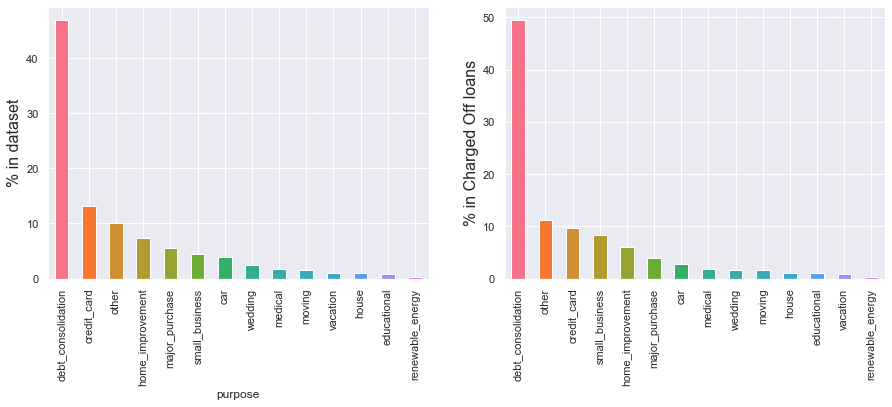

In [90]:
plot_percentages(loan_app, 'purpose',_figsize=(15,5))

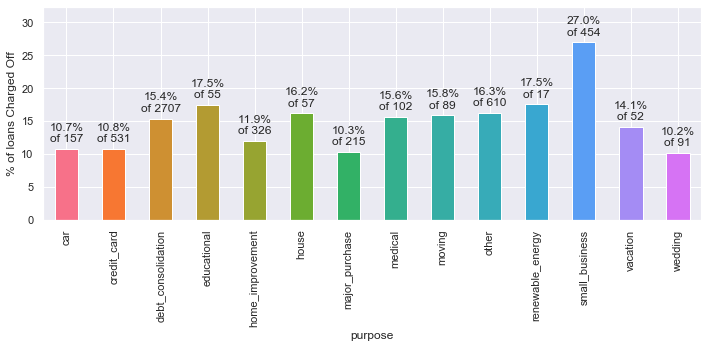

In [91]:
plotBarplot(loan_app, 'purpose',_figsize=(10, 5))

### `26% of loans for small business are Charged Off. Making them the most risky purpose.
### `Approximately ~49% of the loans are issued for the purpose of dept consolidation.
### `17% of the loans for renewable_enrgy are charged Off`

## <font color = "Red"> Observation : Loan distribution employee length(years) wise </font>

In [92]:
loan_app.emp_length.value_counts(normalize=True)

10   0.22
0    0.12
2    0.11
3    0.11
4    0.09
5    0.09
1    0.08
6    0.06
7    0.05
8    0.04
9    0.03
Name: emp_length, dtype: float64

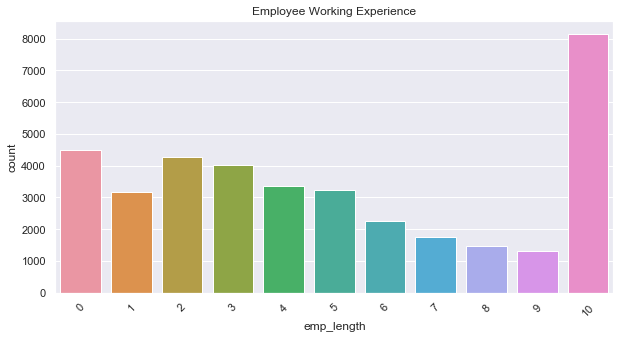

In [93]:
plotCountPlot("emp_length",sorted(loan_app.emp_length.unique()),"Employee Working Experience",(10,5))

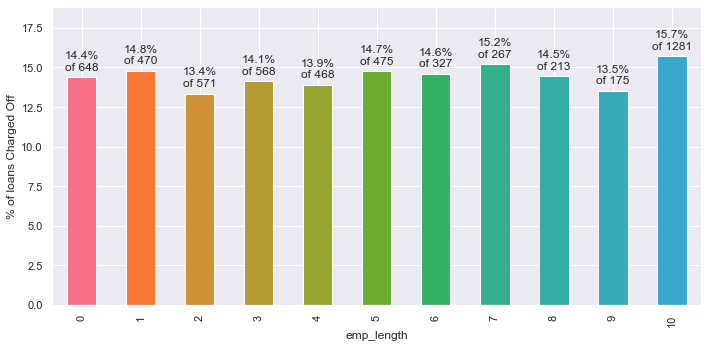

In [94]:
plotBarplot(loan_app,"emp_length",_figsize=(10, 5))

#### Majority of employees applying for the loan have more than 10 years of experience However this variable is approximately constant hence not useful

## <font color = "Red"> Observation : Loan distribution term wise </font>

In [95]:
loan_app.term.value_counts()

36    28308
60     9191
Name: term, dtype: int64

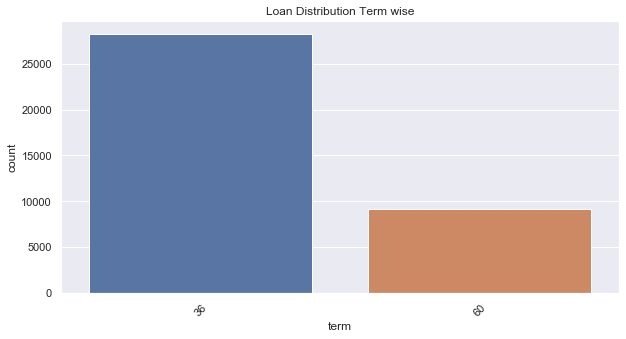

In [96]:
plotCountPlot("term",loan_app.term.unique(),"Loan Distribution Term wise",(10,5))

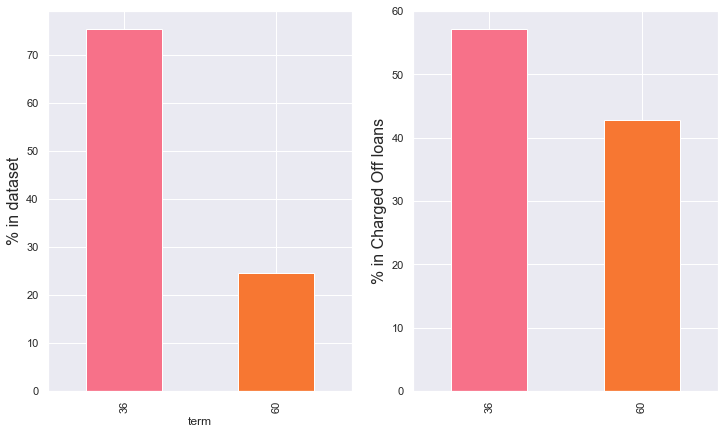

In [97]:
plot_percentages(loan_app, 'term',_figsize=(12,7))

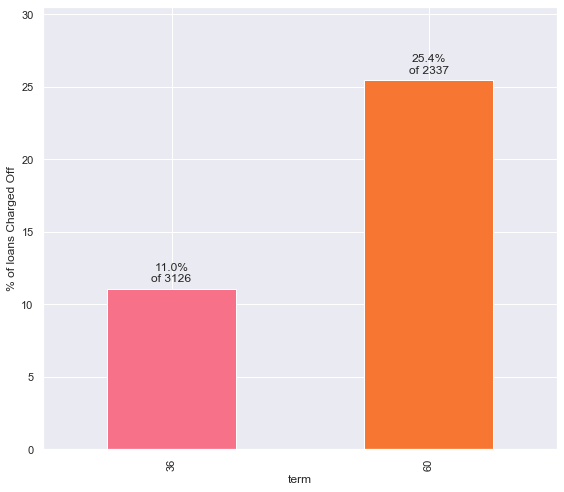

In [98]:
plotBarplot(loan_app,"term")

#### `Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years`.<br>
####  `Among Charged Off loans, percentatge of 60Months term loan is greater than 36Months which means the higher term loans have a higher chance of default.`

## <font color = "Red"> Observation : Loan distribution interest rate wise </font>

In [99]:
#create interest rate bucket

loan_app["int_rate_bucket"] = round(loan_app.int_rate)

In [100]:
loan_app.groupby('loan_status')['int_rate_bucket'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5463.00,13.73,3.62,5.00,11.00,13.00,16.00,24.00
Fully Paid,32036.00,11.53,3.56,5.00,8.00,11.00,14.00,24.00


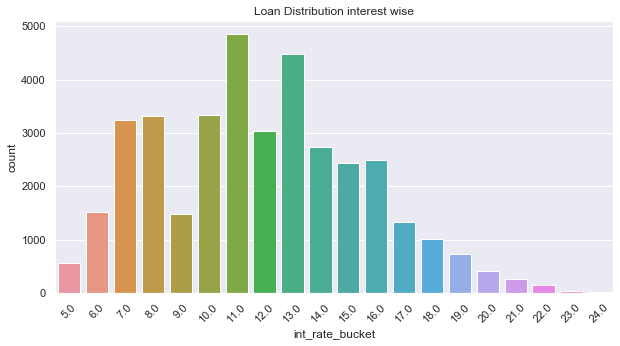

In [101]:
plotCountPlot("int_rate_bucket",sorted(round(loan_app.int_rate_bucket).unique()),"Loan Distribution interest wise",(10,5))

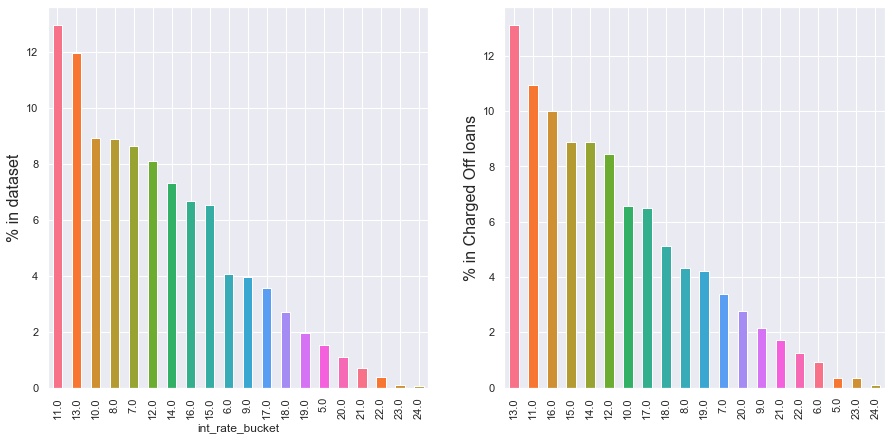

In [102]:
plot_percentages(loan_app, 'int_rate_bucket',_figsize=(15,7))

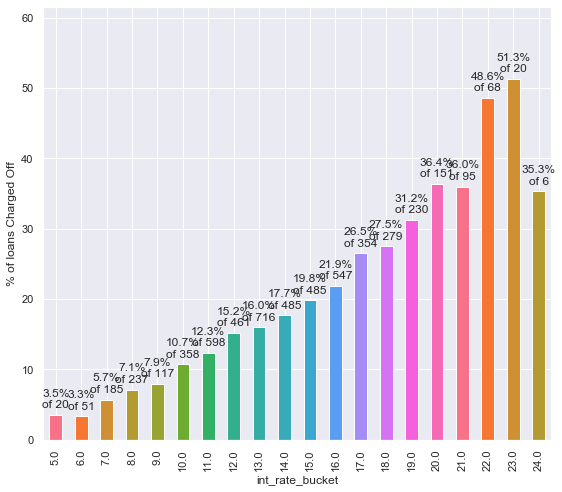

In [103]:
plotBarplot(loan_app,"int_rate_bucket")

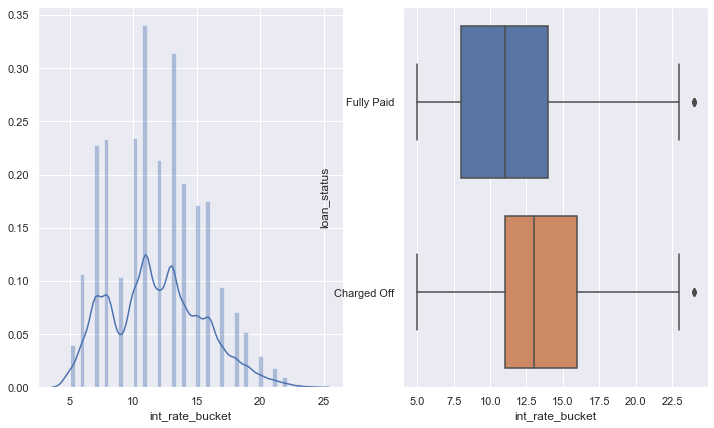

In [104]:
plot_distribution(loan_app, 'int_rate_bucket',_figsize=(12,7))

#### ` from above observation it is clear that higher the interest rate, higher the chances of resulting in bad loans`
#### `Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate around 11.8%`
#### `The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As,` `the risk increases the rate of interest imposed on the loan also increases`

## <font color = "Red"> Observation : Loan distribution installments wise </font>

In [105]:
#create installments buckets

loan_app.installment.describe()

count   37499.00
mean      319.81
std       205.76
min        15.69
25%       165.38
50%       276.34
75%       421.65
max      1305.19
Name: installment, dtype: float64

In [106]:
loan_app['installment_bucket'] = pd.cut(loan_app['installment'], [0,300,600,900,1200,1500], labels=['0-299','300-599','600-899','900-1199','1200-1500'])

In [107]:
loan_app.installment_bucket.value_counts()

0-299        20224
300-599      13329
600-899       3491
900-1199       405
1200-1500       50
Name: installment_bucket, dtype: int64

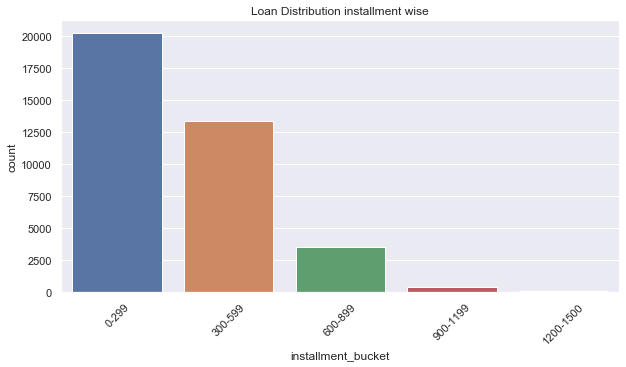

In [108]:
plotCountPlot("installment_bucket",loan_app.installment_bucket.unique(),"Loan Distribution installment wise",_figsize=(10,5))

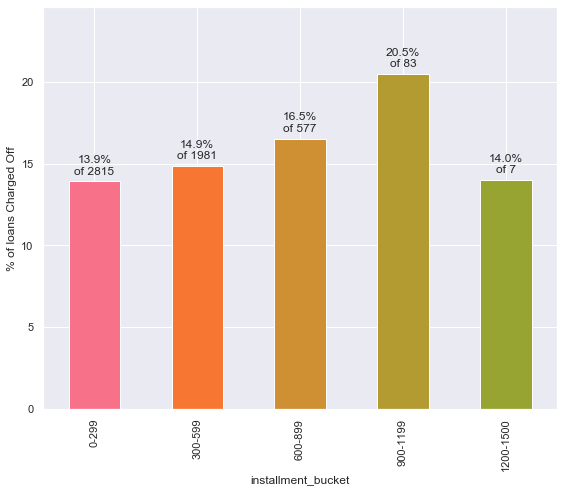

In [109]:
#distribution in charged off loans

plotBarplot(loan_app,"installment_bucket")

### `This clearly indicates that higher installments in charged off loans are resulting in defaulters`

## <font color = "Red"> Observation : Loan distribution as per pub_recrd_bankruptcies </font>

In [110]:
loan_app.pub_recrd_bankruptcies.value_counts()

0    35233
1     1605
2      661
Name: pub_recrd_bankruptcies, dtype: int64

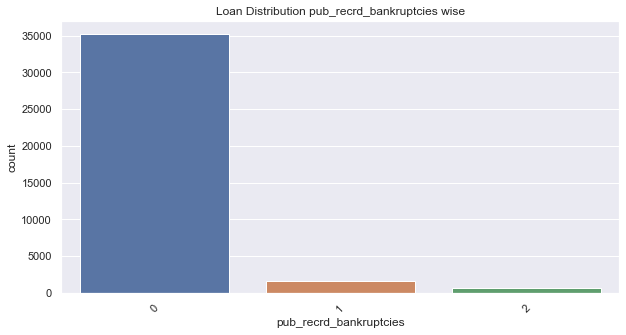

In [111]:
plotCountPlot("pub_recrd_bankruptcies",loan_app.pub_recrd_bankruptcies.unique(),"Loan Distribution pub_recrd_bankruptcies wise",(10,5))

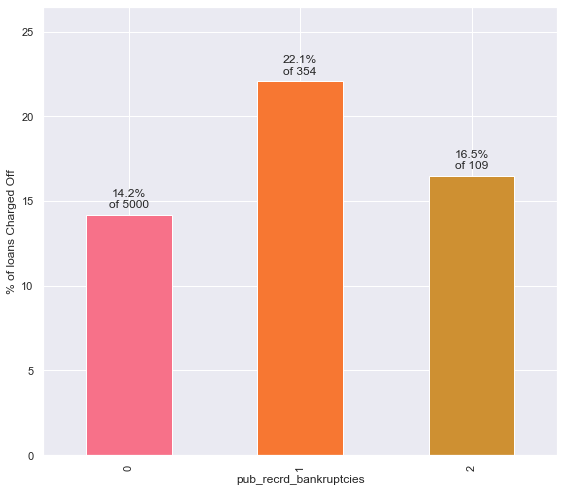

In [112]:
#distribution in charged off loans as per pub_record_bankrupties

plotBarplot(loan_app,"pub_recrd_bankruptcies")

### `The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.`

## <font color = "Red"> Observation : Loan distribution as per home ownership </font>

In [113]:
loan_app.home_ownership.value_counts()

RENT        18135
MORTGAGE    16387
OWN          2881
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

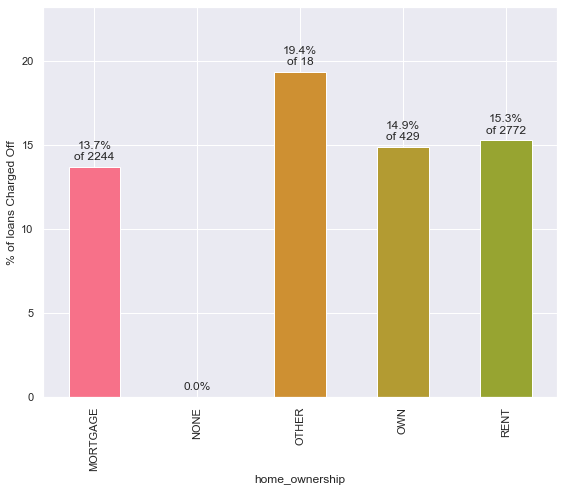

In [114]:
plotBarplot(loan_app,"home_ownership")

### `from above graph we can say that home ownership does not impact on loan defaulters`

## <font color = "Red"> Observation : Loan distribution as per debt to income ratio </font>

In [115]:
loan_app["debt-to-income"].describe()

count   37499.00
mean       13.31
std         6.66
min         0.00
25%         8.18
50%        13.41
75%        18.57
max        29.99
Name: debt-to-income, dtype: float64

In [116]:
loan_app['debt-to-income-bin'] = pd.cut(loan_app['debt-to-income'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

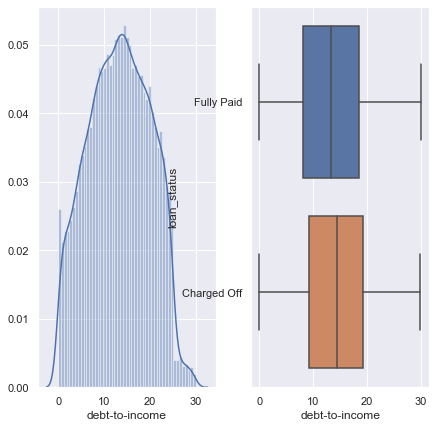

In [117]:
plot_distribution(loan_app, 'debt-to-income')

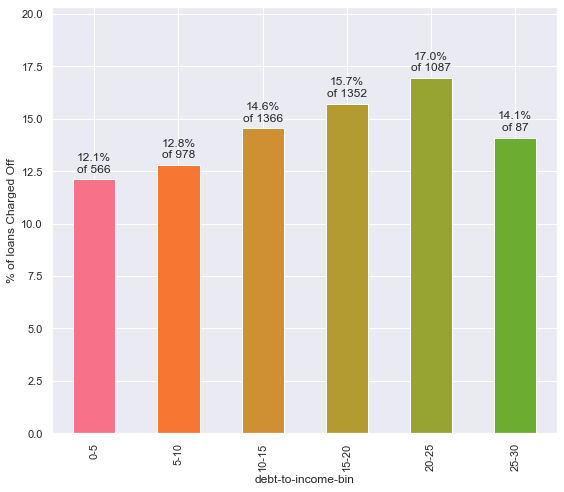

In [118]:
plotBarplot(loan_app, 'debt-to-income-bin')

#### `When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off` <br>
#### `Higher the dti higher the chances of loan being Charged Off`

## <font color = "Red"> Observation : Loan distribution as per delinq_2yrs ratio </font>

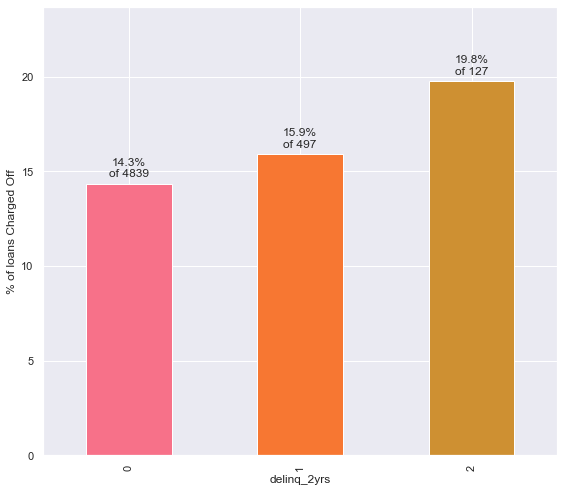

In [119]:
plotBarplot(loan_app, 'delinq_2yrs')

#### `The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11 `<br>
#### `There are higher chances of default if this variable is greater than 1.`

## <font color = "Red"> Observation : Loan distribution as per loan amounts ratio </font>

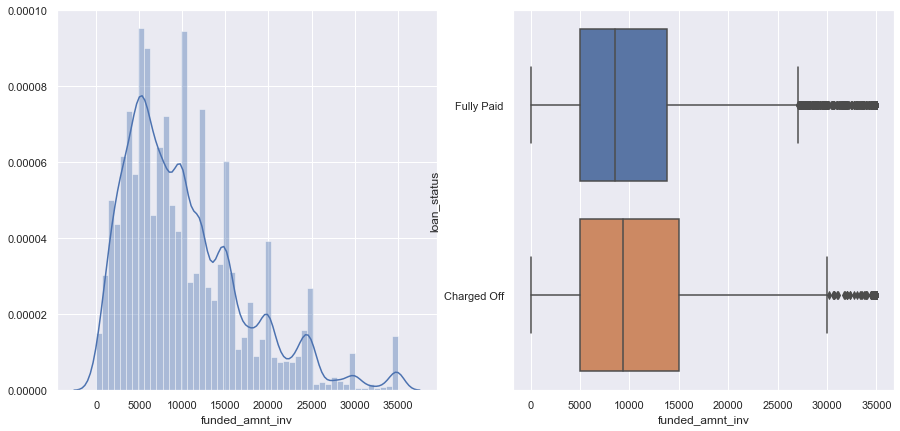

In [120]:
plot_distribution(loan_app, 'funded_amnt_inv',_figsize=(15,7))

Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)<br>
Funding amounts see a spike around each 5000 boundary. We will use 5000 as bucket size for later analysis.<br>
Charged off loans are shifted towards higher average loan amount request.

In [121]:
#creating a bucket for loan_amount
loan_app['loan_amnt_bin'] = pd.cut(loan_app['funded_amnt_inv'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

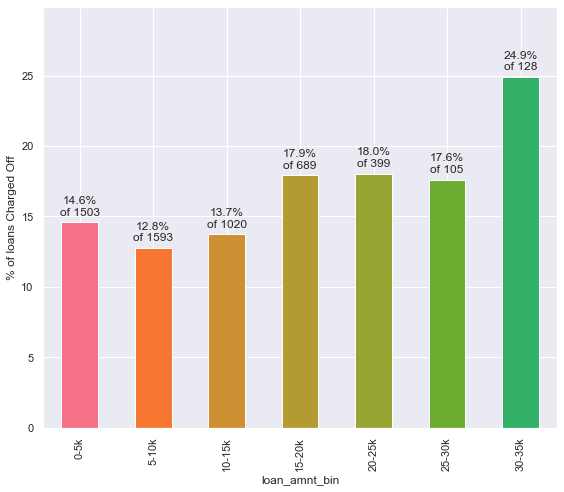

In [122]:
plotBarplot(loan_app, 'loan_amnt_bin')

#### `The % of charged off loans increases substancially as we go up the loan amount buckets`<br> 
#### `Most loans are below 20000 amount The higher loans, though lesser in number, carry a substantially higher risk of default`

## <font color = "Red"> Observation : Loan distribution as per verification status </font>

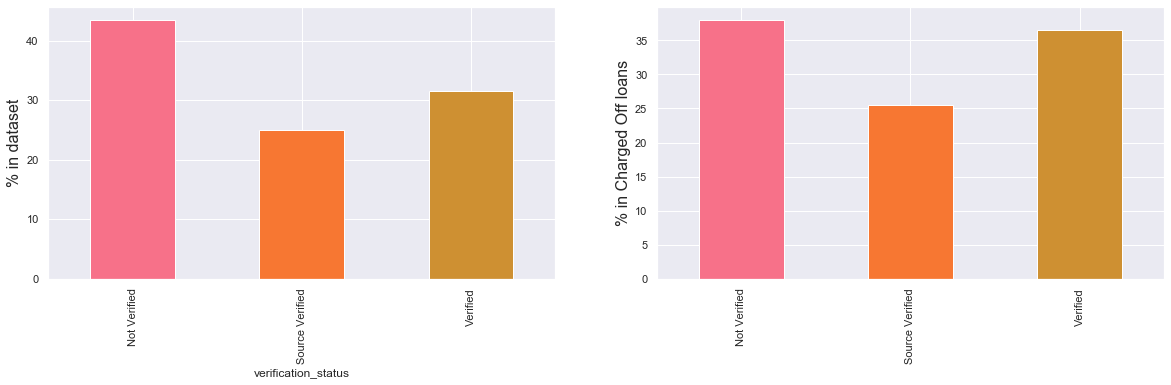

In [123]:
plot_percentages(loan_app, 'verification_status', True,_figsize=(20,5))

#### `Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage`.<br>
#### `Verified loans show more charged Off percentage as compared to Not verified loans. This is unexpected and will be investigated later in bivariate analysis`

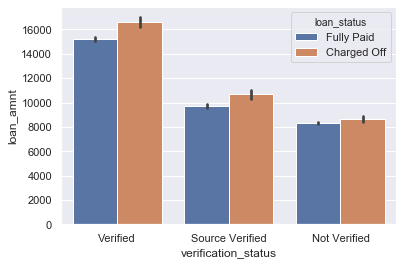

In [124]:
snb.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_app, estimator=np.mean)

Higher loan amounts are Verified more often.<br>
We already know that larger loans are less in number, but see a higher charge off rate.<br>
This, combined with previous observation, explains why verfied loans see a higher rate of default. It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.<br>

## <font color = "Red"> Observation : Loan distribution as per annual income </font>

In [125]:
loan_app.annual_inc.describe()

count    37499.00
mean     65155.12
std      35096.67
min       4000.00
25%      40000.00
50%      58000.00
75%      80004.00
max     234000.00
Name: annual_inc, dtype: float64

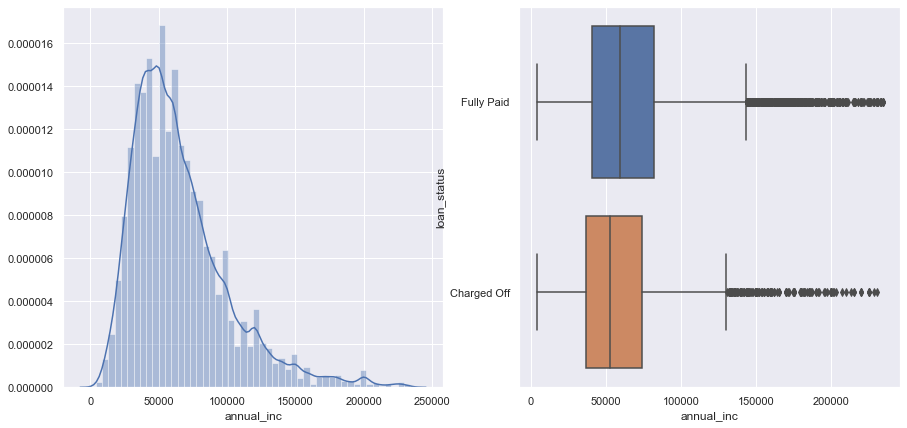

In [126]:
plot_distribution(loan_app,"annual_inc",_figsize=(15,7))

majority of applicatnts have income between 0-150000

In [127]:
#create bucket for annual income range
loan_app['annual_inc_bucket'] = pd.cut(loan_app['annual_inc'], [0,20000,40000,60000,80000,100000,500000], labels=['0-20000','20000-40000','40000-60000','60000-80000','80000-100000','100000-500000'])


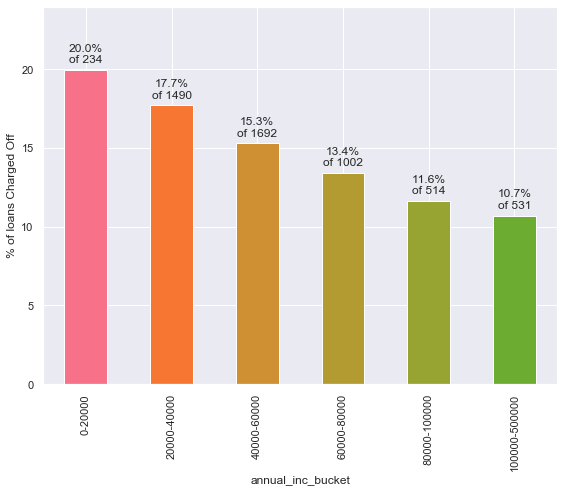

In [128]:
plotBarplot(loan_app, 'annual_inc_bucket')

#### `Above graph clearly says that lower annual income leads to loan defaluts.`

## <font color = "Red"> Observation : Loan distribution as per revol_util </font>

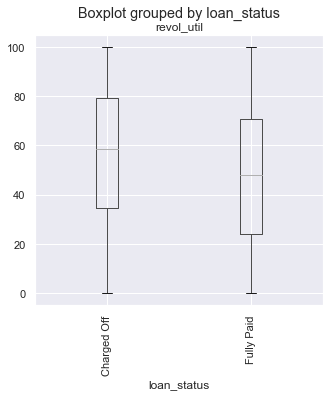

In [129]:
fig, ax = plt.subplots(figsize=(5,5))
loan_app.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

The average utilization rate is around 49%<br>
Average revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans. This requires more analysis.

In [130]:
#create a derived colun for revol_util bucket
loan_app['revol_util_bin'] = round(loan_app['revol_util']/5)

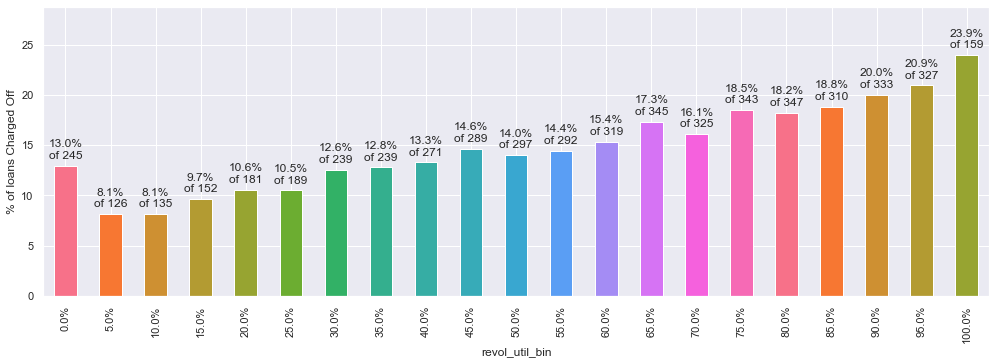

In [131]:
ax = plotBarplot(loan_app, 'revol_util_bin',_figsize=(14,5))
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

#### `from above graph it seems that  the revol_util ratio is increases substancially. Some have utilized 100% of their credit.

In [132]:
loan_app['last_pymnt_amnt_log'] = loan_app['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

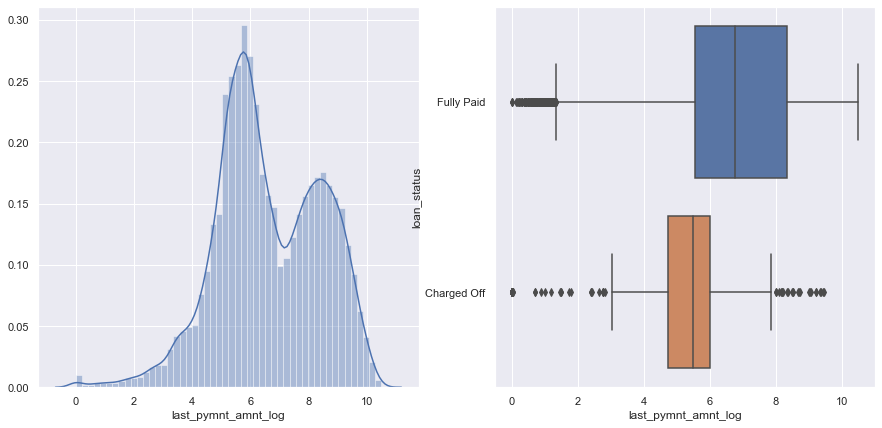

In [133]:
plot_distribution(loan_app, 'last_pymnt_amnt_log',_figsize=(15,7))


#### `The last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans. This is expected in case of charged of loans`

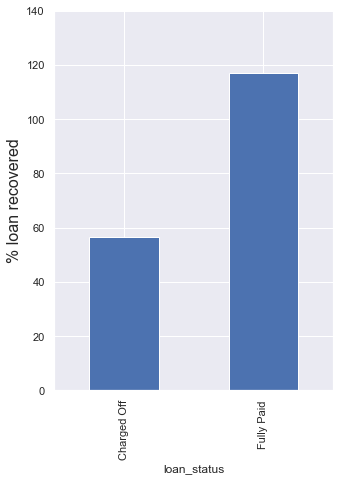

In [134]:
#check how much amount is recovered from different loan status

plt.figure(figsize=(5,7))

axis = ((loan_app.groupby('loan_status').total_pymnt.sum() / loan_app.groupby('loan_status').loan_amnt.sum())*100).plot.bar()
axis.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)

Lending Club only recovers 59% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 20% profit.

### Correlation between variables

### <font color='red'>Observation: Correlation between int_rate and grade </font>

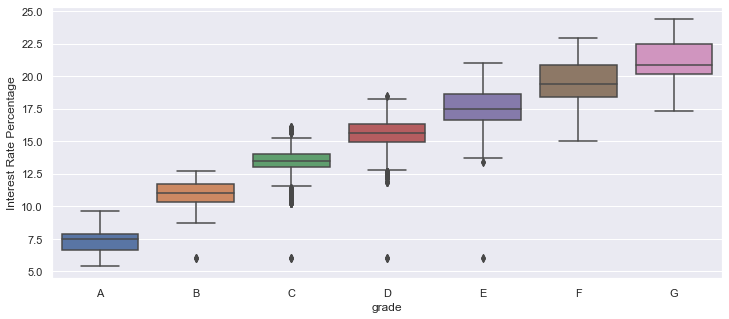

In [135]:
plt.figure(figsize=(12,5))
snb.boxplot(y='int_rate', x='grade', data=loan_app,order= ['A','B','C','D','E','F','G'])
plt.ylabel('Interest Rate Percentage')
plt.show()

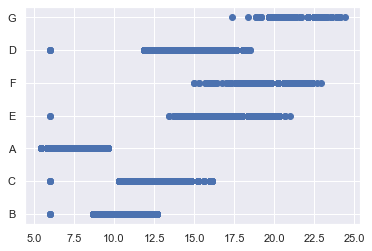

In [136]:
plt.scatter(loan_app.int_rate,loan_app.grade)

#### `Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans.<br>`

In [137]:
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

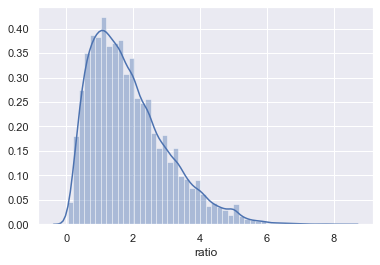

In [138]:
loan_app['ratio'] = loan_app['loan_amnt'] * 10 / loan_app['annual_inc']
snb.distplot(loan_app['ratio'])

observation:<br>
<br>
### `As long as loan amount is less than 20% of annual income, defaults are low`
### `Loan amounts of 30% of annual income or higher see a high rate of default.`

<Figure size 504x360 with 0 Axes>

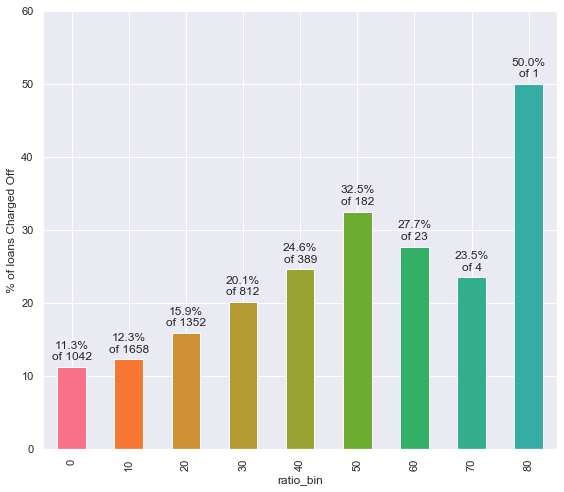

In [139]:
loan_app['ratio_bin'] = (loan_app['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotBarplot(loan_app, 'ratio_bin')

Lets' Verify Univariate Analysis using Power Law

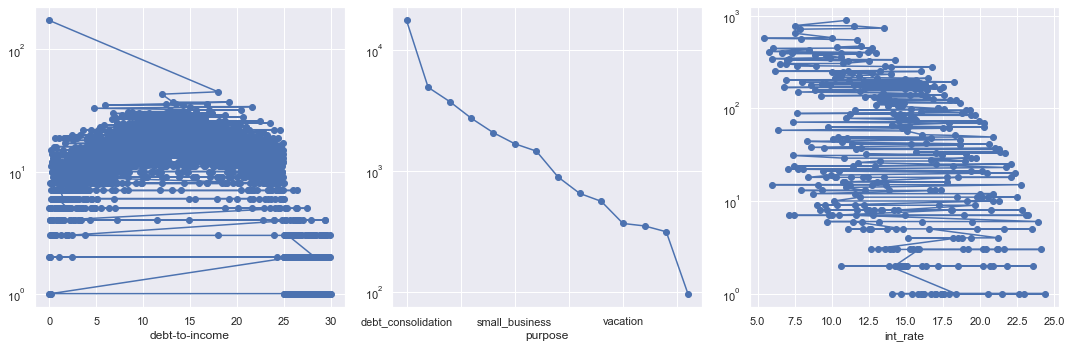

In [140]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
loan_app.groupby('debt-to-income').funded_amnt_inv.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 2)
loan_app.groupby('purpose').funded_amnt_inv.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 3)
loan_app.groupby('int_rate').funded_amnt_inv.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

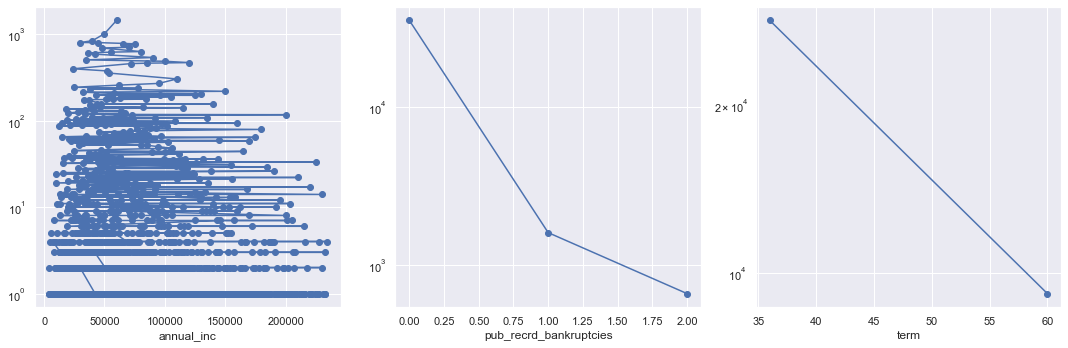

In [141]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
loan_app.groupby('annual_inc').funded_amnt_inv.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 2)
loan_app.groupby('pub_recrd_bankruptcies').funded_amnt_inv.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 3)
loan_app.groupby('term').funded_amnt_inv.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

### Purpose  and Pub_recrd_bankruptcies follows power law

## Bivariate Analysis


### <font color = 'red'> correlation between interset rate and term </font>

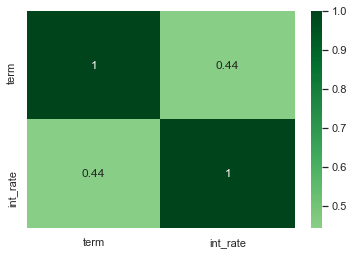

In [143]:
snb.heatmap(loan_app.loc[:,["term","int_rate"]].corr(), annot=True, center=0.5,cmap='Greens')

We can see the positive correlation between int rate and term.Which means if term increases int rate of loan increases

### <font color = 'red'> correlation between interest rate and loan amout </font>

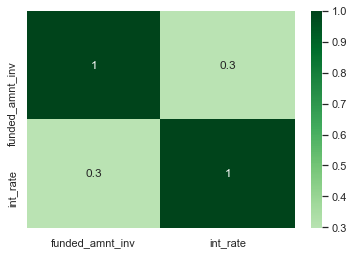

In [144]:
snb.heatmap(loan_app.loc[:,["funded_amnt_inv","int_rate"]].corr(), annot=True, center=0.5,cmap='Greens')

So here also we can see positive correlation between loan amount and int rate. if loan amount increases we can see an increase in int rate

### <font color = 'red'> correlation between installmet and int rate </font>

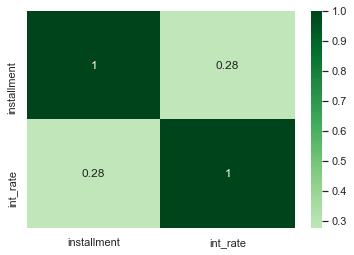

In [145]:
snb.heatmap(loan_app.loc[:,["installment","int_rate"]].corr(), annot=True, center=0.5,cmap='Greens')

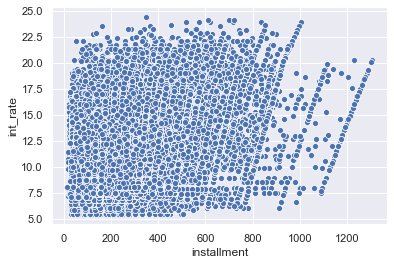

In [146]:
snb.scatterplot(x="installment",y="int_rate",data=loan_app)

so installments increases with higher interset rates

### <font color = 'red'> correlation between annual_inc and int rate </font>

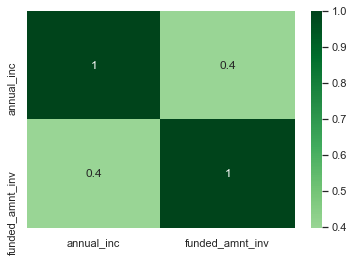

In [147]:
snb.heatmap(loan_app.loc[:,["annual_inc","funded_amnt_inv"]].corr(), annot=True, center=0.5,cmap='Greens')

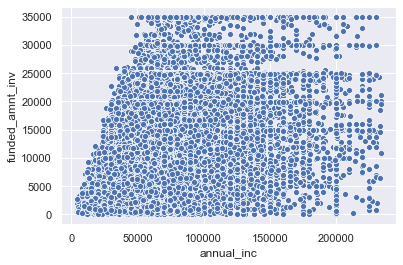

In [148]:
snb.scatterplot(x="annual_inc",y="funded_amnt_inv",data=loan_app)

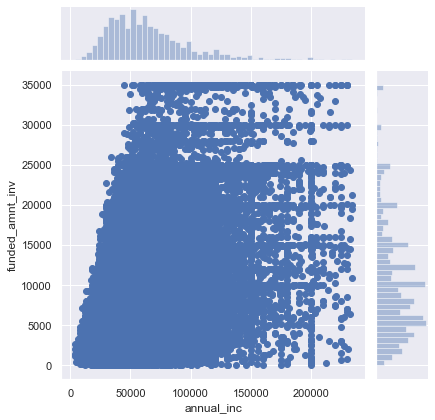

In [149]:
snb.jointplot('annual_inc', 'funded_amnt_inv', loan_app.loc[loan_app['annual_inc']<260000])
plt.show()

so here also we can see positive correlation between annual_inc and investor_funds. So if you have higher income then you will get more amount of loan.

### <font color = 'red'> correlation between earliest_cr_line and int rate </font>

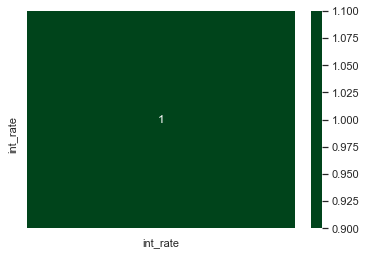

In [150]:
snb.heatmap(loan_app.loc[:,["earliest_cr_line","int_rate"]].corr(), annot=True, center=0.5,cmap='Greens')


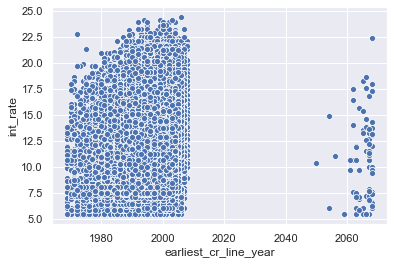

In [151]:
snb.scatterplot(x="earliest_cr_line_year",y="int_rate",data=loan_app)

There is a clear correlation between int rate and  earliest_cr_line

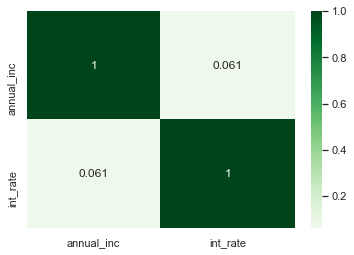

In [152]:
snb.heatmap(loan_app.loc[:,["annual_inc","int_rate"]].corr(), annot=True, center=0.5,cmap='Greens')

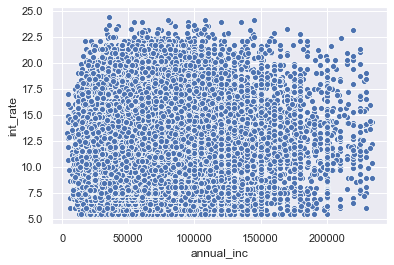

In [153]:
snb.scatterplot(x="annual_inc",y="int_rate",data=loan_app)

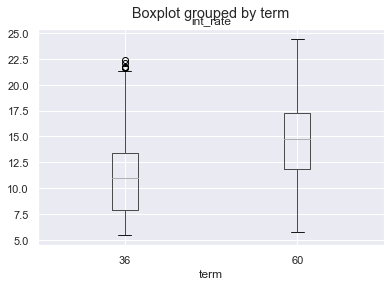

In [154]:
#Relationship between int_rate and term

loan_app.boxplot(column='int_rate', by='term')
plt.show()

Observation:<br>
<br>
Interest rates are based on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

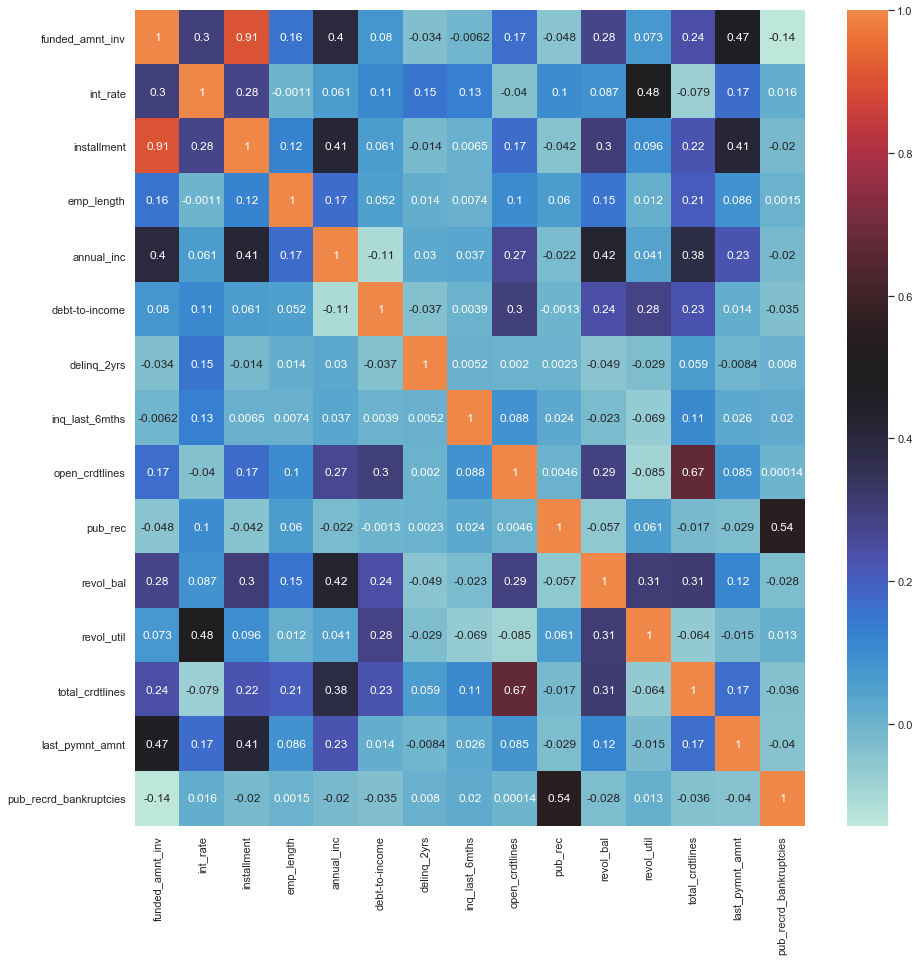

In [155]:
plt.figure(figsize=(15,15))
cont_var= ['funded_amnt_inv', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'debt-to-income', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_crdtlines', 'pub_rec', 'revol_bal', 'revol_util',
       'total_crdtlines', 'last_pymnt_date', 'last_pymnt_amnt', 'last_credit_pull_date',
       'pub_recrd_bankruptcies']
corr = loan_app[cont_var].corr()
snb.heatmap(corr, annot=True, center=0.5)

Observation:<br>
<br>
funded_amnt_inv is correlated to last_payment_amount with r factor.44, as expected<br>
int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.<br>
loan_amnt revol_bal are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.<br>
delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value.

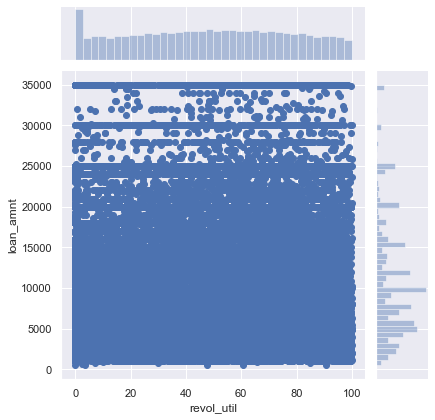

In [156]:
snb.jointplot('revol_util', 'loan_amnt', loan_app)

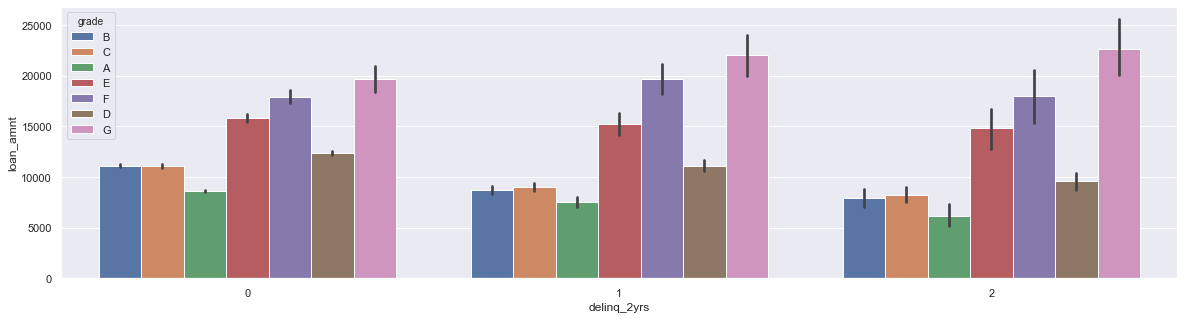

In [157]:
plt.figure(figsize=(20,5))
snb.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=loan_app, estimator=np.mean)
plt.show()

Observation:<br>
<br>
Not many loans receive invstment with higher number of delinquencies(>3). Despite the low loan amount request, these loans are considered risky and are not invested much in.<br>
Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies.

### So as per our analysis below are the  driver variables which can help us for our hypothesis on a defaulter

term,int_rate,dti,purpose,annual_income,bankrupcies,revo_util